# <font color='blue'>MAI5002 - Fundamentos de Matemática Aplicada</font>

## <font color='blue'>Ortogonalidade - Solução dos Exercícios </font>

### Material produzido por Luis Gustavo Nonato 

ICMC-USP

----

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercício 1)
O arquivo `teste_matriz.dat` (disponível para download no repositório) armazena uma matriz com 10 linhas e 7 colunas. Leia a matriz e verifique se as colunas são ortogonais.

In [17]:
# Solução

X = np.loadtxt('teste_matriz.dat') 
#print(X)

prodint = np.dot(X.T, X)
np.set_printoptions(precision = 4, suppress = True)
print(prodint)

#Note que fazendo o produto interno de X^T X, temos que a matriz é ortogonal.        


[[ 1.  0. -0.  0.  0. -0. -0.]
 [ 0.  1. -0. -0.  0.  0.  0.]
 [-0. -0.  1.  0.  0.  0. -0.]
 [ 0. -0.  0.  1.  0. -0.  0.]
 [ 0.  0.  0.  0.  1.  0. -0.]
 [-0.  0.  0. -0.  0.  1. -0.]
 [-0.  0. -0.  0. -0. -0.  1.]]


### Exercício 2)
Construa uma transformação linear que leva vetores de $\mathbb{R}^5$ para o sub-espaço $\mathcal{S}$ gerado pelos vetores $[1,1,1]$ e $[0,0,1]$ em $\mathbb{R}^3$. Verificar que a transformação obtida está realizando o mapeamento corretamente.

In [52]:
# Solução

# Lembrando que uma transformação linear leva o espaço linha no espaço coluna
# a matriz deve ter dimensão 3x5
# Além disso, os vetores [1,1,1] e [0,0,1] devem estar entre as colunas
# e as demais colunas devem ser combinações lineares destes vetores

#Criando uma matriz linha
A = np.zeros((3,5))
#print(A)

#colocando os vetores [1,1,1] e [0,0,1] para garantir

A[:,:2] = np.array([[1,1,1],[0,0,1]]).T
#A[:,0] = [1,1,1]
#A[:,1] = [0,0,1]
#print(A)

#Criando os elementos para a combinação das outras colunas de A

c = np.array([[1,2,3],[-1,0,1]])
#print('c = \n', c)

#Complementando a matriz A com vetores que são combinação a partir de [1,1,1] e [0,0,1]
A[:,2:] = np.dot([A[:,:2]],c)
#print('A = \n', A)

#Fazendo o produto vetorial de [1,1,1] e [0,0,1]
n = np.cross(A[:,0],A[:,1])   
#print('n = \n', n)

#criando um vetor randómico b que é solução de Ax

for i in range(10):
    x = np.random.uniform(low=-1,high=1,size=(5,1))
    b = np.dot(A,x)
    #print('b',i,'= \n',b)
    print(np.dot(n,b))          #verificando se n é ortogonal a b


[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]


Logo, todos os vetores que são levados do R5 para o R3 a partir da transformação A, são ortogonais ao vetor n que é produto vetorial de a1 e a2, ou seja, b está indo para o plano em R3.

### Exercício 3)
Construa uma transformação linear $\mathbf{A}:\mathbb{R}^5\rightarrow\mathbb{R}^3$ de modo que os vetores $[1,1,0,0,0]$ e $[0,1,0,0,0]$ sejam o complemento ortogonal do espaço linha.
Vefique que a transformação encontrada está correta.

In [71]:
# Solução

A = np.zeros((3,5))        #Gerando a matriz da transformação de R5 em R3

A[:3,:] = np.array([[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])    #Gerando as linhas da matriz, onde elas são o complemento
#print(A)                                                     #ortogonal do nucleo, ou seja, são ortogonais e geram R5

#Assim, para verificar se A satisfaz a transformação, basta que Av1 = 0 e Av2 = 0

v1 = np.array([1,1,0,0,0]).T
v2 = np.array([0,1,0,0,0]).T
#print(v1,v2)

print(np.dot(A,v1))
print(np.dot(A,v2))

[0. 0. 0.]
[0. 0. 0.]


### Exercício 4)
Construa uma transformação linear que mapeie o hiperplano $x_1+x_2+x_3+x_4+x_5=0$ para o  espaço $\mathbb{R}^2$ e visualize o resultado da transformação para alguns pontos gerados sobre o hiperplano.

[[ 1  0 -1  0  0]
 [ 0 -1  0  2 -1]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
(2, 50)


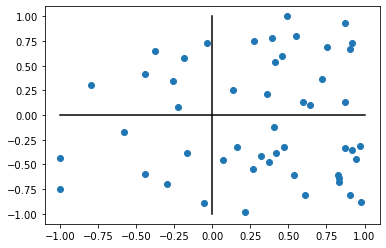

In [34]:
# Solução

#v1 = np.array([1,-1,2,-1,-1])
#v2 = np.array([1,0,2,-2,-1])

A = np.zeros([2,5])
#A[:2,:] = np.array([v1,v2])
A = np.array([[1,0,-1,0,0],[0,-1,0,2,-1]])
print(A)

#X = zeros([5,50])

X = np.random.uniform(-1,1,size=(5,50))
#print(X[-1])
X[-1] = -np.sum(X[:-1],axis=0)


#Verificando que os pontos estão no hiperplano (satisfazem a equação)
print(np.sum(X, axis=0))

# para visualizar o resultado da transformação, basta aplicar o transformação A na matrix X
# e plotar os pontos gerados

B = np.dot(A,X)  # a matrix M contém os pontos em R2 em suas colunas
print(np.shape(B))

# plotando os eixos 
plt.plot([-1,1],[0,0],color='k')
plt.plot([0,0],[-1,1],color='k')

# plotando os pontos
plt.scatter(X[0,:],X[1,:])

### Exercício 5)
No exercício anterior, podemos afirmar que qualquer ponto  (diferente de $[0,0]$) sobre o hiperplano $x_1+x_2+x_3+x_4+x_5=0$ será mapeado para um ponto diferente de $[0,0]$ em $\mathbb{R}^2$? Em caso afirmativo justifique sua resposta, em caso negativo, dê exemplo de um ponto sobre no hiperplano que é mapeado na origem do espaço $\mathbb{R}^2$.

In [35]:
# Solução

#Base do espaço nulo de A
y1 = np.array([0,-1,0,0,1])
y2 = np.array([-3/2,2,-3/2,1,0])

#Logo podemos gerar uma combinação linear dessa base
a = 1
b = 1
z = a*y1 + a*y2

print(z)

#note que z está no hiperplano, pois

# verificando se z está no hiperplano x_1+x_2+x_3+x_4+x_5=0
n = np.array([1,1,1,1,1])                  #pois n é ortogonal a x, logo n pertence ao hiperplano
#print(np.dot(n.T,z))
print('ponto z=a*y1+b*y2 pertence ao plano?',np.abs(np.dot(n.T,z))<1e-5)

# mapeando o ponto z via transformação A
print('A imagem de z=',z,'pela transformação A é',np.dot(A,z))


[-1.5  1.  -1.5  1.   1. ]
ponto z=a*y1+b*y2 pertence ao plano? True
A imagem de z= [-1.5  1.  -1.5  1.   1. ] pela transformação A é [0. 0.]


### Exercício 6) 
Considere a transformação linear dada pela matriz 
$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo da transformação?<br>
b) Encontre uma base para o espaço núcleo.<br>
c) Verifique que a base encontrada está gerando o  núcleo.

In [38]:
# Solução
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])


base = np.zeros([7,4])
print(base)

for i in range(4):
    v = np.zeros([7,1])
    v[i+3] = 1
    v[2] = -v[4] - 2*v[6]
    v[1] = 5/6*v[2] - 1/3*v[3] - v[4] + 1/2*v[5] + 7/18*v[6]
    v[0] = -9/2*v[2] - v[3] - 5/2*v[5] - 3/2*v[6]
    base[:,i] = v[:,0]

print(base)
    

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[-1.          4.5        -2.5         7.5       ]
 [-0.33333333 -1.83333333  0.5        -1.27777778]
 [-0.         -1.         -0.         -2.        ]
 [ 1.          0.          0.          0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


In [44]:
# Verificando que os vetores calculados estão no núcleo

np.set_printoptions(precision=5,suppress=True)
print(np.dot(B,base))

[[ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


### Exercício 7)
Sabemos que para toda transformação linear $\mathbf{X}$, os vetores que pertencem ao espaço linha de $\mathbf{X}$ são ortogonais aos vetores que estão no espaço nulo de $\mathbf{X}$.

Considerando a propriedade acima, construa uma transformação linear cujo núcleo (espaço nulo) é gerado pelos vetores $\mathbf{x}_1=[1,1,0,1]$ e $\mathbf{x}_2=[0,1,0,1]$.

In [47]:
x1 = np.array([1,1,0,1])
x2 = np.array([0,1,0,1])

#tomando y1 e y2 dois vetores do espaço linha da matriz A

A = np.zeros((2,4))

y1 = np.array([0,1,0,-1])
y2 = np.array([0,1,-1,-1])

A[:2,:] = np.array([[y1, y2]])
print(A)

#gerando z combinação linear de x1 e x2
a = 1
b = 1
z = a*x1 + b*x2

print(np.dot(A,z))

[[ 0.  1.  0. -1.]
 [ 0.  1. -1. -1.]]
[0. 0.]


### Exercício 8)
Escreva um código para, dada uma base qualquer de um subespaço, encontrar uma base ortonormal para este mesmo subespaço. Teste o seu código para a base dada como colunas da matriz $\mathbf{V}$ gerada no código abaixo. Verifique que a base obtida é de fato ortonormal.

In [55]:
# Solução

### Exercício 9) 
Considere o espaço gerado pelos vetores $[1,1,1]$ e $[1,0,1]$. Construa uma base ortogonal para este espaço e encontre a projeção de qualquer ponto de $\mathbb{R}^3$ sobre plano gerado pelos vetores ortogonais.

In [49]:
A = np.array([[1,1,1],[1,0,1]]).T

Q,R = np.linalg.qr(A) # as colunas de Q são a base ortogonal para o espaço gerado pelas colunas de A
print(Q)

[[-0.57735  0.40825]
 [-0.57735 -0.8165 ]
 [-0.57735  0.40825]]
